In [1]:
import os
import time
import torch
import math
import torchvision
from torchvision import transforms as transforms
from torch import nn
from torch.nn import functional as F
from math import cos,pi

import matplotlib.pyplot as plt
import numpy as np
import random

torch.cuda.empty_cache()

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.manual_seed(17)

class HaS(object): 
#     def __init__(self):
        
    def __call__(self, img):
        # get width and height of the image
        img_= np.array(img).copy()
        s = img_.shape
        wd = s[0]
        ht = s[1]

        # possible grid size, 0 means no hiding
        grid_size=3

        # hiding probability
        hide_prob = 0.1
 
        # randomly choose one grid size
#         grid_size= grid_sizes[random.randint(0,len(grid_sizes)-1)]

        # hide the patches
        if(grid_size>0):
             for x in range(0,wd,grid_size):
                 for y in range(0,ht,grid_size):
                     x_end = min(wd, x+grid_size)  
                     y_end = min(ht, y+grid_size)
                     if(random.random() <=  hide_prob):
                           img_[x:x_end,y:y_end,:]=0

        return img_
    
torch.manual_seed(17)

        
# class HideEdge(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[x_end:,y_end:,:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:hide_size,:hide_size,:]=0
# #         img_[x_end:,:,:]=0
# #         img_[:,y_end:,:]=0
# #         img_[:hide_size,:,:]=0
# #         img_[:,:hide_size,:]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_

   
# class Hide_after_Norm(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img_):
#         # get width and height of the image
# #         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[1]
#         ht = s[2]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size
        
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[:,x_end:,y_end:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:,:hide_size,:hide_size]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_
    
    

# # torch.cuda.manual_seed(17) # for GPU
# aug_train = transforms.Compose([
#     transforms.RandomHorizontalFlip(), # 水平翻转
# #     torchvision.transforms.CenterCrop(26),
# #     HideEdge(),
#     torchvision.transforms.RandomRotation(15),
# #     torchvision.transforms.CenterCrop(28),
#     # transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5), # color aug
# #     transforms.RandomCrop(32, padding=4), # 裁剪
#     # transforms.RandomResizedCrop((32,32),scale=(0.1,1),ratio=(0.5,2))
# #     hide_patch(),
# #     HaS(),
# #     HideEdge(2),
#     transforms.ToTensor(),
# #     Norm(2),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)),# normalization
#     Hide_after_Norm(2)
#     ])

# aug_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)), # normalization
#     Hide_after_Norm(2)
#     ])

# trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)
# # testdata = torchvision.datasets.CIFAR10('./CIFAR10',train=False,download=True,transform=transforms.ToTensor())
# # print(len(trainingdata),len(testdata))

In [4]:
torch.manual_seed(17)
torch.cuda.manual_seed_all(17)

aug_train = transforms.Compose([
    transforms.RandomCrop(32,padding=4,padding_mode='reflect'),
    transforms.RandomHorizontalFlip(), # 水平翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

aug_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)

Files already downloaded and verified


In [5]:
def get_mean_and_std(dataset):
  '''Compute the mean and std value of dataset.'''
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
  mean = torch.zeros(3)
  std = torch.zeros(3)
  print('==> Computing mean and std..')
  for inputs, targets in dataloader:
      for i in range(3):
          mean[i] += inputs[:,i,:,:].mean()
          std[i] += inputs[:,i,:,:].std()
  mean.div_(len(dataset))
  std.div_(len(dataset))
  return mean, std

def load_data(is_train,aug,batch_size):
  dataset = torchvision.datasets.CIFAR10('./CIFAR10',train=is_train,download=True,transform=aug)
#   mean, std = get_mean_and_std(dataset)
#   print(mean, std)
  dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train)
  return dataloader

batch_size = 128 # param
trainDataLoader = load_data(is_train=True,aug=aug_train,batch_size=batch_size)
testDataLoader = load_data(is_train=False,aug=aug_test,batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) 6
[[[-0.9147032  -0.38956204  0.0274618  ...  0.01201648  0.18191507
    0.15102442]
  [-0.32778072 -0.03431951  0.10468844 ... -0.21966343  0.1973604
    0.2591417 ]
  [-0.09610081  0.29003236  0.24369638 ... -0.6366873  -0.51312464
   -0.32778072]
  ...
  [ 1.0931895   1.2321974   1.448432   ...  0.22825105  0.66072035
    1.6646665 ]
  [ 1.2013068   1.3248694   1.3866507  ... -0.38956204 -0.17332745
    1.1704161 ]
  [ 1.3866507   1.2785335   1.1549708  ... -0.8529219  -0.8065859
    0.7997283 ]]

 [[-1.2393323  -0.8772444  -0.53089947 ... -0.5151565  -0.3419841
   -0.3419841 ]
  [-0.8142726  -0.6725861  -0.5623854  ... -0.68832904 -0.32624117
   -0.29475525]
  [-0.6411001  -0.42069885 -0.45218474 ... -1.003188   -0.9244732
   -0.76704377]
  ...
  [ 0.57110703  0.6813077   0.9804237  ... -0.21604052  0.19327614
    1.2323109 ]
  [ 0.6025929   0.74427944  0.8229942  ... -0.83001554 -0.68832904
    0.6655647 ]
  [ 0.87022305  0.8072512   0.6340788  ... -1.12913

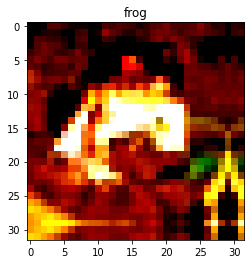

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

image,label = trainingdata[0]
image_= np.array(image).copy()
print(image.shape, label)
print(image_)

%matplotlib inline
plt.imshow(image.numpy().transpose(1,2,0))
plt.title(str(classes[label]))
plt.show()

In [7]:
# trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=batch_size,shuffle=True)
# testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=batch_size,shuffle=False)

# images, labels = iter(trainDataLoader).next()
# plt.figure(figsize=(17,8))
# for index in np.arange(0,5):
#   plt.subplot(1,5,index+1)
#   plt.imshow(images[index].numpy().transpose(1,2,0))
#   plt.title(str(classes[labels[index]]))

def get_mean_and_std(dataset):
  '''Compute the mean and std value of dataset.'''
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
  mean = torch.zeros(3)
  std = torch.zeros(3)
  print('==> Computing mean and std..')
  for inputs, targets in dataloader:
      for i in range(3):
          mean[i] += inputs[:,i,:,:].mean()
          std[i] += inputs[:,i,:,:].std()
  mean.div_(len(dataset))
  std.div_(len(dataset))
  return mean, std


In [8]:
class BasicBlock(nn.Module):

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out



class ResNet(nn.Module):
    def __init__(self, in_planes, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = in_planes

        self.conv1 = nn.Conv2d(3, self.in_planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_planes)
        self.layer1 = self._make_layer(block, in_planes, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, in_planes*2, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, in_planes*4, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, in_planes*8, num_blocks[3], stride=2)
#         self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
#         self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
#         self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, self.in_planes*8, num_blocks[3], stride=2)
        self.linear = nn.Linear(1024, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
#         print(x.shape)
        out = F.relu(self.bn1(self.conv1(x)))
#         print(out.shape)
        out = self.layer1(out)
#         print(out.shape)
        out = self.layer2(out)
#         print(out.shape)
        out = self.layer3(out)
#         print(out.shape)
#         out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
#         print(out.shape)
        out = out.view(out.size(0), -1)
#         print(out.shape)
        out = self.linear(out)
        return out
    
    def init_weights(self):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):
                nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu') # weight initialization
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.BatchNorm2d):
                nn.init.constant_(m.weight,1)
                nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,std=1e-3)
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)

def project1_model():
#     return ResNet(BasicBlock, [2, 2, 2, 2])
#     return ResNet(BasicBlock, [2, 2, 2])
    return ResNet(64, BasicBlock, [3, 3, 3])

# model1 = nn.Sequential(project1_model(), nn.AdaptiveAvgPool2d((1,1)), nn.Flatten(), nn.Linear(512, 10)).cuda()
model1 = project1_model().cuda()
model1.init_weights()

In [9]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    # torch.numel() returns number of elements in a tensor

print(count_parameters(model1))

4335434


In [10]:
def adjust_learning_rate(optimizer, current_epoch,max_epoch,lr_min=0,lr_max=0.1,warmup=True):
    warmup_epoch = 10 if warmup else 0
    if current_epoch < warmup_epoch:
        lr = lr_max * current_epoch / warmup_epoch
    else:
        lr = lr_min + (lr_max-lr_min)*(1 + cos(pi * (current_epoch - warmup_epoch) / (max_epoch - warmup_epoch))) / 2
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [11]:
# X = torch.rand(size=(1, 3, 32, 32)).cuda()
# for layer in model1:
#   X = layer(X)
#   print(layer.__class__.__name__,'output shape:\t', X.shape)

In [ ]:
num_epochs = 5000 # param
epoch_start = 0
# path = 'adam_rotate_center_crop1.pt'
# path = 'block_3.pt'
path = 'batch_128_lr_0.1_no_crop_decay_avg_4.pt'

train_loss_history = []
test_loss_history = []
test_accuracy_history = []
train_accuracy_history = []

Loss = torch.nn.CrossEntropyLoss()
lr = 0.1 # param
lr_min=0.001
# optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=0.9,weight_decay=5e-4) # changable optimizer
# optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=0.9) # changable optimizer
# optimizer = torch.optim.Adam(model1.parameters(),lr=lr, betas=(0.9,0.999), eps=1e-08, amsgrad=False) # changable optimizer
momentum = 0.9
nesterov = True
optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=momentum,nesterov=nesterov)

# torch.cuda.empty_cache()

if os.path.exists(path):
  checkpoint = torch.load(path)
  print('Read model from checkpoint')
  model1.cuda().load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  epoch_start = checkpoint['epoch']
  Loss = checkpoint['Loss']
  train_loss_history = checkpoint['train_loss_history']
  test_loss_history = checkpoint['test_loss_history']
  test_accuracy_history = checkpoint['test_accuracy_history']
  train_accuracy_history = checkpoint['train_accuracy_history']
  print('Restart from epoch',epoch_start)
    

for epoch in range(epoch_start+1, num_epochs + 1):
  timestart = time.time()

  train_loss = 0.0
  test_loss = 0.0
  test_accuracy = 0.0
  train_accuracy = 0.0

  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = model1.cuda()(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    adjust_learning_rate(optimizer=optimizer,current_epoch=epoch,max_epoch=num_epochs,lr_min=lr_min,lr_max=lr,warmup=True)
    optimizer.step()
    train_loss += fit.item()
    train_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()

  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = model1.cuda()(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
      test_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()


  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  test_accu = test_accuracy/len(testDataLoader)
  train_accu = train_accuracy/len(trainDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  test_accuracy_history.append(test_accu)
  train_accuracy_history.append(train_accu)
  print('Epoch %s, Train loss %s, Test loss %s, Train accuracy %s, Test accuracy %s, Cost %s s'%(epoch,
                                                                                                   train_loss,test_loss,
                                                                                                   train_accu,test_accu,
                                                                                                   time.time()-timestart))
  
  if epoch % 5 == 0 and epoch != 0:
    torch.save({'epoch':epoch,
          'model_state_dict':model1.cuda().state_dict(),
          'optimizer_state_dict':optimizer.state_dict(),
          'Loss':Loss,
          'train_loss_history':train_loss_history,
          'test_loss_history':test_loss_history,
          'test_accuracy_history':test_accuracy_history,
          'train_accuracy_history':train_accuracy_history},path)
    print('Model saved in epoch %s'%(epoch))

Read model from checkpoint
Restart from epoch 500
Epoch 501, Train loss 1.5871391956411695e-05, Test loss 0.46993549363805526, Train accuracy 100.0, Test accuracy 94.03678797468355, Cost 70.38088822364807 s
Epoch 502, Train loss 1.6447927019012416e-05, Test loss 0.46884004465198215, Train accuracy 100.0, Test accuracy 94.03678797468355, Cost 69.68887448310852 s
Epoch 503, Train loss 1.598956839101967e-05, Test loss 0.4697809291036823, Train accuracy 100.0, Test accuracy 94.06645569620254, Cost 69.6357524394989 s
Epoch 504, Train loss 1.7212922008577085e-05, Test loss 0.4673157896893688, Train accuracy 100.0, Test accuracy 94.07634493670886, Cost 69.56810975074768 s
Epoch 505, Train loss 1.6825974035258326e-05, Test loss 0.46770284273013285, Train accuracy 100.0, Test accuracy 94.09612341772151, Cost 69.96002650260925 s
Model saved in epoch 505
Epoch 506, Train loss 1.4656667233234213e-05, Test loss 0.4685265900260663, Train accuracy 100.0, Test accuracy 94.04667721518987, Cost 69.87489

Epoch 550, Train loss 0.003506708560572962, Test loss 0.44052395054811166, Train accuracy 99.89010549872123, Test accuracy 93.3742088607595, Cost 51.01417136192322 s
Model saved in epoch 550
Epoch 551, Train loss 0.003816871741776867, Test loss 0.42612699174051044, Train accuracy 99.86413043478261, Test accuracy 93.33465189873418, Cost 51.069217681884766 s
Epoch 552, Train loss 0.002975075284641958, Test loss 0.4504792028212849, Train accuracy 99.90009590792839, Test accuracy 93.30498417721519, Cost 51.07393431663513 s
Epoch 553, Train loss 0.005226236013381671, Test loss 0.49134179492351376, Train accuracy 99.81897378516624, Test accuracy 92.8698575949367, Cost 51.06756043434143 s
Epoch 554, Train loss 0.005595977154161866, Test loss 0.4564750416416533, Train accuracy 99.82416879795396, Test accuracy 93.35443037974683, Cost 51.021522998809814 s
Epoch 555, Train loss 0.005699441939139577, Test loss 0.4490422781415378, Train accuracy 99.78820332480818, Test accuracy 93.12697784810126, C

Epoch 598, Train loss 0.0038464234004529302, Test loss 0.45855521321108067, Train accuracy 99.86812659846548, Test accuracy 93.31487341772151, Cost 50.838311195373535 s
Epoch 599, Train loss 0.0032185050606614793, Test loss 0.435100772170515, Train accuracy 99.8821131713555, Test accuracy 93.72033227848101, Cost 50.860477924346924 s
Epoch 600, Train loss 0.0019200328191860986, Test loss 0.4443324937756303, Train accuracy 99.93006713554988, Test accuracy 93.56210443037975, Cost 50.98402166366577 s
Model saved in epoch 600
Epoch 601, Train loss 0.002034644473224732, Test loss 0.44211919002140626, Train accuracy 99.93086636828644, Test accuracy 93.62143987341773, Cost 50.963438987731934 s
Epoch 602, Train loss 0.002871016671890147, Test loss 0.4374759681994402, Train accuracy 99.90808823529412, Test accuracy 93.57199367088607, Cost 50.98600673675537 s
Epoch 603, Train loss 0.0016900318244219552, Test loss 0.43255761077132404, Train accuracy 99.95204603580562, Test accuracy 93.720332278481

Epoch 646, Train loss 0.0023327959730689023, Test loss 0.45925108350436145, Train accuracy 99.92007672634271, Test accuracy 93.72033227848101, Cost 51.02600979804993 s
Epoch 647, Train loss 0.0019382410376196243, Test loss 0.5003180676198835, Train accuracy 99.9320652173913, Test accuracy 93.24564873417721, Cost 51.029046058654785 s
Epoch 648, Train loss 0.00435167696119476, Test loss 0.4927540912611198, Train accuracy 99.85414002557545, Test accuracy 92.99841772151899, Cost 50.9869327545166 s
Epoch 649, Train loss 0.003538590919819296, Test loss 0.4895554412203499, Train accuracy 99.86692774936061, Test accuracy 93.10719936708861, Cost 50.92655086517334 s
Epoch 650, Train loss 0.004307036828598092, Test loss 0.4706483002799221, Train accuracy 99.86413043478261, Test accuracy 93.22587025316456, Cost 50.8621723651886 s
Model saved in epoch 650
Epoch 651, Train loss 0.004543667105822014, Test loss 0.45209750705221785, Train accuracy 99.85414002557545, Test accuracy 93.56210443037975, Cos

Epoch 694, Train loss 0.001571019551380343, Test loss 0.49845656615835204, Train accuracy 99.94884910485933, Test accuracy 93.56210443037975, Cost 50.88686776161194 s
Epoch 695, Train loss 0.0016605923448878893, Test loss 0.4871622657851328, Train accuracy 99.9560421994885, Test accuracy 93.5126582278481, Cost 50.92499828338623 s
Model saved in epoch 695
Epoch 696, Train loss 0.0009221416403401145, Test loss 0.4858215876583812, Train accuracy 99.96603260869566, Test accuracy 93.33465189873418, Cost 51.082834243774414 s
Epoch 697, Train loss 0.001480999784435506, Test loss 0.4728187067033369, Train accuracy 99.94804987212277, Test accuracy 93.52254746835443, Cost 51.0669584274292 s
Epoch 698, Train loss 0.0027542909518366017, Test loss 0.4752546359277979, Train accuracy 99.92007672634271, Test accuracy 93.4434335443038, Cost 51.021257638931274 s
Epoch 699, Train loss 0.0012060975712056624, Test loss 0.5007250203361994, Train accuracy 99.9560421994885, Test accuracy 93.52254746835443, Co

Epoch 742, Train loss 0.001319740978914224, Test loss 0.45166973486731327, Train accuracy 99.9560421994885, Test accuracy 93.59177215189874, Cost 50.89432978630066 s
Epoch 743, Train loss 0.0005973183866024814, Test loss 0.4470087811822378, Train accuracy 99.98201726342711, Test accuracy 93.67088607594937, Cost 50.88308882713318 s
Epoch 744, Train loss 0.0006086934179780792, Test loss 0.45616456243810777, Train accuracy 99.98401534526855, Test accuracy 93.76977848101266, Cost 50.881020069122314 s
Epoch 745, Train loss 0.0005861016550629315, Test loss 0.4586359301134001, Train accuracy 99.9880115089514, Test accuracy 93.72033227848101, Cost 50.903719425201416 s
Model saved in epoch 745
Epoch 746, Train loss 0.0009278555644412701, Test loss 0.48090141162842137, Train accuracy 99.97402493606138, Test accuracy 93.64121835443038, Cost 50.94269037246704 s
Epoch 747, Train loss 0.001495300123041482, Test loss 0.48104994649751276, Train accuracy 99.95804028132993, Test accuracy 93.651107594936

Epoch 790, Train loss 0.0011174054466637198, Test loss 0.492383864578567, Train accuracy 99.9560421994885, Test accuracy 93.59177215189874, Cost 50.785825967788696 s
Model saved in epoch 790
Epoch 791, Train loss 0.0007704136888774939, Test loss 0.4681001033964036, Train accuracy 99.97202685421995, Test accuracy 93.8488924050633, Cost 54.076733112335205 s
Epoch 792, Train loss 0.0010019409765917738, Test loss 0.4913654947959924, Train accuracy 99.97002877237851, Test accuracy 93.49287974683544, Cost 51.020567655563354 s
Epoch 793, Train loss 0.001795758532205796, Test loss 0.4931619854856141, Train accuracy 99.93406329923273, Test accuracy 93.26542721518987, Cost 51.030715465545654 s
Epoch 794, Train loss 0.0015025211376725781, Test loss 0.4740203453015678, Train accuracy 99.94605179028133, Test accuracy 93.83900316455696, Cost 51.05928421020508 s
Epoch 795, Train loss 0.0006130258203940464, Test loss 0.4698456818638723, Train accuracy 99.98001918158567, Test accuracy 93.82911392405063

Epoch 838, Train loss 0.00030656870177628423, Test loss 0.484214118245659, Train accuracy 99.99000959079284, Test accuracy 93.50276898734177, Cost 51.024405002593994 s
Epoch 839, Train loss 0.00037203352885491534, Test loss 0.4964851664402817, Train accuracy 99.99000959079284, Test accuracy 93.79944620253164, Cost 51.02354335784912 s
Epoch 840, Train loss 0.00042772228737571693, Test loss 0.5278494459918782, Train accuracy 99.97802109974424, Test accuracy 93.55221518987342, Cost 50.81657147407532 s
Model saved in epoch 840
Epoch 841, Train loss 0.000629747492390499, Test loss 0.5034401129129566, Train accuracy 99.97802109974424, Test accuracy 93.78955696202532, Cost 50.936068296432495 s
Epoch 842, Train loss 0.0009336040675015477, Test loss 0.5169655604264404, Train accuracy 99.96603260869566, Test accuracy 93.75, Cost 50.89151573181152 s
Epoch 843, Train loss 0.0006707127814264338, Test loss 0.5104030860187132, Train accuracy 99.97602301790282, Test accuracy 93.73022151898734, Cost 50

Epoch 886, Train loss 0.001265107531563474, Test loss 0.5233007602487938, Train accuracy 99.96003836317135, Test accuracy 93.43354430379746, Cost 50.97059941291809 s
Epoch 887, Train loss 0.0007536556137036844, Test loss 0.49666050265106976, Train accuracy 99.96403452685422, Test accuracy 93.3445411392405, Cost 50.96107339859009 s
Epoch 888, Train loss 0.0009939885672235712, Test loss 0.49825747641204277, Train accuracy 99.96003836317135, Test accuracy 93.49287974683544, Cost 51.01236295700073 s
Epoch 889, Train loss 0.00106209660221528, Test loss 0.504385834253287, Train accuracy 99.96403452685422, Test accuracy 93.60166139240506, Cost 51.01159882545471 s
Epoch 890, Train loss 0.0006263739263869845, Test loss 0.49827139881215515, Train accuracy 99.98201726342711, Test accuracy 93.69066455696202, Cost 50.921021938323975 s
Model saved in epoch 890
Epoch 891, Train loss 0.0008214135549748686, Test loss 0.48860778272906435, Train accuracy 99.96803069053709, Test accuracy 93.48299050632912

Epoch 934, Train loss 0.0007110539188971861, Test loss 0.5202383372602584, Train accuracy 99.97802109974424, Test accuracy 93.76977848101266, Cost 50.95953154563904 s
Epoch 935, Train loss 0.0007641631011207285, Test loss 0.5298253211039531, Train accuracy 99.97602301790282, Test accuracy 93.6807753164557, Cost 50.963507652282715 s
Model saved in epoch 935
Epoch 936, Train loss 0.0009866031219854647, Test loss 0.5136760527951808, Train accuracy 99.96803069053709, Test accuracy 93.6807753164557, Cost 50.980671644210815 s
Epoch 937, Train loss 0.00043692602459997524, Test loss 0.5246492567696149, Train accuracy 99.99000959079284, Test accuracy 93.5126582278481, Cost 50.881274700164795 s
Epoch 938, Train loss 0.0011171948498772016, Test loss 0.5351774926427044, Train accuracy 99.97002877237851, Test accuracy 93.53243670886076, Cost 50.89263081550598 s
Epoch 939, Train loss 0.0004004473226092343, Test loss 0.5101871950716912, Train accuracy 99.9880115089514, Test accuracy 93.75, Cost 50.85

Epoch 982, Train loss 0.0007640040580239594, Test loss 0.4954411679808098, Train accuracy 99.98001918158567, Test accuracy 93.46321202531645, Cost 50.993666887283325 s
Epoch 983, Train loss 0.0006831836979635998, Test loss 0.48890628156405463, Train accuracy 99.98201726342711, Test accuracy 93.62143987341773, Cost 51.02284502983093 s
Epoch 984, Train loss 0.0012741571967300547, Test loss 0.5134918690670894, Train accuracy 99.95684143222506, Test accuracy 93.53243670886076, Cost 51.024476051330566 s
Epoch 985, Train loss 0.001760507435611697, Test loss 0.4942550711050818, Train accuracy 99.9320652173913, Test accuracy 93.48299050632912, Cost 51.022512912750244 s
Model saved in epoch 985
Epoch 986, Train loss 0.0009263674845491358, Test loss 0.48027043138878256, Train accuracy 99.97602301790282, Test accuracy 93.94778481012658, Cost 51.03384780883789 s
Epoch 987, Train loss 0.0013723219616360108, Test loss 0.49443425653101525, Train accuracy 99.96003836317135, Test accuracy 93.7796677215

Epoch 1030, Train loss 0.00019207612291398656, Test loss 0.49172728268217436, Train accuracy 99.99400575447571, Test accuracy 94.10601265822785, Cost 72.30442690849304 s
Model saved in epoch 1030
Epoch 1031, Train loss 0.0003168671698067224, Test loss 0.4947518784599968, Train accuracy 99.99400575447571, Test accuracy 93.93789556962025, Cost 71.66226315498352 s
Epoch 1032, Train loss 0.0003454687274337698, Test loss 0.5054328794343562, Train accuracy 99.98601342710998, Test accuracy 93.8488924050633, Cost 71.02491545677185 s
Epoch 1033, Train loss 0.0006022090515932399, Test loss 0.505157553602623, Train accuracy 99.97882033248082, Test accuracy 93.88844936708861, Cost 72.37399077415466 s
Epoch 1034, Train loss 0.0007505939765162007, Test loss 0.5087633694321672, Train accuracy 99.97202685421995, Test accuracy 93.96756329113924, Cost 72.4253716468811 s
Epoch 1035, Train loss 0.0005329403919423221, Test loss 0.5162055033813172, Train accuracy 99.98201726342711, Test accuracy 93.83900316

Epoch 1078, Train loss 0.00011663630584577882, Test loss 0.5103429939739311, Train accuracy 99.99800191815856, Test accuracy 93.69066455696202, Cost 71.47343111038208 s
Epoch 1079, Train loss 0.00020315857180648958, Test loss 0.5152902367371547, Train accuracy 99.99200767263427, Test accuracy 93.8192246835443, Cost 71.63883519172668 s
Epoch 1080, Train loss 0.0001600537525629882, Test loss 0.5139830269485335, Train accuracy 99.99400575447571, Test accuracy 93.73022151898734, Cost 70.62062335014343 s
Model saved in epoch 1080
Epoch 1081, Train loss 0.00021444825300492924, Test loss 0.5366518952518324, Train accuracy 99.9880115089514, Test accuracy 93.57199367088607, Cost 70.6754035949707 s
Epoch 1082, Train loss 9.501410069902213e-05, Test loss 0.515860577833049, Train accuracy 99.99800191815856, Test accuracy 93.75, Cost 72.20159316062927 s
Epoch 1083, Train loss 0.00010321961684787423, Test loss 0.51641672755344, Train accuracy 99.99400575447571, Test accuracy 93.85878164556962, Cost 

In [ ]:
num_epochs = 611
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [ ]:
print('Accuracy:',sum(test_accuracy_history[-5:])/5)